# Tutorial 3: Population model & simulation

### Part 1: Numerical Solution to a Recursion Equation

*Not to be confused with programming <a id="recursion_top">[function recursion](#recursion_bottom)</a>*

A simple recursion relation can be solved by hand for any initial condition.  
For example:

$$ N\left(t+1\right) = 2\times N\left(t\right) + 1 $$
starting at $N \left(0\right)= 5 $

#### solution ####

$$ \begin{matrix}
  N \left(0\right)&= 5 \\
  N\left(1\right) &= 2\times 5 + 1 = 11 \\
  N\left(2\right) &= 2\times 11 + 1 = 23 \\
  N\left(3\right) &= 2\times 23 + 1 = 47 \\
  N\left(4\right) &= 2\times 47 + 1 = 95 \\
  N\left(5\right) &= 2\times 95 + 1 = 191 \\
\end{matrix}
$$

This by-hand process can be implemented by code: Start with

In [1]:
N=5

Then run the next cell as many times as you like

In [2]:
# Ctrl-Enter this cell
N = 2*N + 1
print(f'{N:_}')

11


#### Question 1 ####
Solve the recursion equation of an exponential population growth $N\left(t+1\right) = 1.2 N\left(t\right) + 0.5 $ starting from 432 individuals $N\left(0\right) = 432$ to fifty generations using a for loop, then plot it.

#### solution ####

We have a way of generating the numbers $N\left(t\right)$, but we need to save them in order to plot them. The naive way is to use a python list and keep appending the new number

In [3]:
# naive solution
n=432
N=[n]
for i in range(50):
    n = 1.2*n+0.5
    N.append(n)
print(N)

[432, 518.9, 623.18, 748.3159999999999, 898.4791999999999, 1078.6750399999999, 1294.9100479999997, 1554.3920575999996, 1865.7704691199995, 2239.4245629439993, 2687.809475532799, 3225.8713706393587, 3871.5456447672304, 4646.354773720676, 5576.125728464812, 6691.850874157774, 8030.721048989329, 9637.365258787195, 11565.338310544634, 13878.90597265356, 16655.18716718427, 19986.724600621124, 23984.56952074535, 28781.98342489442, 34538.8801098733, 41447.15613184796, 49737.08735821755, 59685.004829861056, 71622.50579583326, 85947.50695499992, 103137.5083459999, 123765.51001519988, 148519.11201823986, 178223.43442188783, 213868.62130626538, 256642.84556751844, 307971.9146810221, 369566.79761722655, 443480.65714067186, 532177.2885688063, 638613.2462825675, 766336.395539081, 919604.1746468971, 1103525.5095762764, 1324231.1114915316, 1589077.8337898378, 1906893.9005478052, 2288273.1806573663, 2745928.3167888396, 3295114.4801466074, 3954137.876175929]


The proper solution is to initialize a numpy array to represent $N\left(t\right)$ where the integer time is the index `N[i]`==$N\left(i\right)$.  
Changing the size of a list like we just did is bad, because python has to slow down to add a bit more memory each time we add a new number.  
We take an array of size of $51$, since we have $N\left(0\right),N\left(1\right),\ldots$ are including $N\left(50\right)$.

In [4]:
# Slightly smarter numpy solution
import numpy as np
import matplotlib.pyplot as plt

N=np.zeros(51) # initialize array

Since we save all $N$s in the array, the recursion becomes $N\left(t+1\right) = 1.2 N\left(t\right) + 0.5 $ $\longrightarrow$ `N[i+1]= 1.2*N[i]+0.5`

In [5]:
N[0]=432 # initialize n0
for i in range(50):
    N[i+1] = 1.2*N[i]+0.5
N

array([4.32000000e+02, 5.18900000e+02, 6.23180000e+02, 7.48316000e+02,
       8.98479200e+02, 1.07867504e+03, 1.29491005e+03, 1.55439206e+03,
       1.86577047e+03, 2.23942456e+03, 2.68780948e+03, 3.22587137e+03,
       3.87154564e+03, 4.64635477e+03, 5.57612573e+03, 6.69185087e+03,
       8.03072105e+03, 9.63736526e+03, 1.15653383e+04, 1.38789060e+04,
       1.66551872e+04, 1.99867246e+04, 2.39845695e+04, 2.87819834e+04,
       3.45388801e+04, 4.14471561e+04, 4.97370874e+04, 5.96850048e+04,
       7.16225058e+04, 8.59475070e+04, 1.03137508e+05, 1.23765510e+05,
       1.48519112e+05, 1.78223434e+05, 2.13868621e+05, 2.56642846e+05,
       3.07971915e+05, 3.69566798e+05, 4.43480657e+05, 5.32177289e+05,
       6.38613246e+05, 7.66336396e+05, 9.19604175e+05, 1.10352551e+06,
       1.32423111e+06, 1.58907783e+06, 1.90689390e+06, 2.28827318e+06,
       2.74592832e+06, 3.29511448e+06, 3.95413788e+06])

Plotting, we see a classic exponential growth (note the 1e6 in the y axis!):

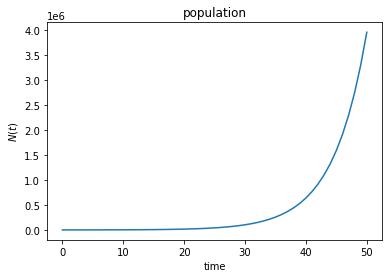

In [6]:
plt.plot(N)
plt.xlabel('time')
plt.ylabel('$N\\left(t\\right)$')
plt.title('population')
plt.show()

#### Question 2 ####

A general recursion equation is some method to find the next value of $Y\left(t+1\right)$ from the current $Y\left(t\right)$  

$$ Y\left(t+1\right) = F\left\lbrack\, t,Y\left(t\right)\, \right] $$

2. make a python function that numerically solves a general recursion equation:  
    ```python
    def solve_recursion(f: callable, t_final: int, y0: float) -> np.array:
        """Solve a recursion equation numerically.
        
        Take a function f(y) of the recurrence, a stop time t_final and an initial value y0.
        Return the solution array y[0:t_final+1].
        """
    ```
    Use this function to solve the logistic equation
    $$ N\left(t+1\right) = N\left(t\right) + r N\left(t\right)\left(1-\frac{N\left(t\right)}{k}\right) $$
    with $r=0.2,k=400,N(0)=40$ from $t=0$ to $t=50 $ (not including 50 as per the function spec), and plot it

#### solution ####

We want to create the function, so we copy the function definition: This contains the name of the function, and the names of its arguments, `f`, `t_final`, and `y0`.  

> Besides that, this definition includes a lot of nonfunctional comment: It has a *docstring* `"""..."""`, which tells us what the function does and how to use it when we use `help(solve_recursion)` or `solve_recursion?` and type hints `: callable`,`:float`,`-> np.array`, which are hints as to what is the expected type of the arguments passed to the function:  
> * `f` is a *callable*, which is anything in python which has `f()` behavior like a function `def f():`, a lambda function `f = lambda x: `, and objects with `__call__` method.  
> * `t_final` is expected to be an integer, 0,1,2000,etc.  
> * `y0` is expected to be a float, so it's some number.  
> * The final type hint is `-> np.array`, the arrow signifying that the function returns a numpy array as its output.  

While all of these are essentially comments which don't really do anything, they give us an in-depth of what the function is suppose to do.

In [7]:
def solve_recursion(f: callable, t_final: int, y0: float) -> np.array:
    """Solve a recursion equation numerically.
    
    Take a function f(y) of the recurrence, a stop time t_final and an initial value y0.
    Return the solution array y[0:t_final+1].
    """

We are asked to make this function solve some recursion equation. Since we already did something similar, we copy that previous code in the function:

```python
def solve_recursion(f: callable, t_final: int, y0: float) -> np.array:
    """Solve a recursion equation numerically.
    
    Take a function f(y) of the recurrence, a stop time t_final and an initial value y0.
    Return the solution array y[0:t_final+1].
    """
    N=np.zeros(51) # initialize array

    N[0]=432 # initialize n0
    for i in range(50):
        N[i+1] = 1.2*N[i]+0.5
    N
```

This is not a working piece of code, so we need tweak it: We are wrapping our code in a function which provides `f`,`t_final`,and `y0` which will be available when it is called and this strip of code is executed:  
1. We have a hardcoded final time of `50`, so we need to use the provided `t_final` instead.  
2. We have a hardcoded initial value `432`, so we need to use the provided `y0` instead.  
3. The function seem to use `y` for the variable, so we rename `N` to `y`.  
4. We need to get the solution out, so we need to `return y` at the end.  

```python
def solve_recursion(f: callable, t_final: int, y0: float) -> np.array:
    """Solve a recursion equation numerically.
    
    Take a function f(y) of the recurrence, a stop time t_final and an initial value y0.
    Return the solution array y[0:t_final+1].
    """
    y=np.zeros(t_final+1) # initialize array

    y[0]=y0
    for i in range(t_final):
        y[i+1] = 1.2*y[i]+0.5
    return y
    # almost there!
```

Finally we have the core of the recursion equation: we hardcoded the equation `y[i+1]=1.2*y[i]+0.5` to get from the solution at time `i` to the solution at time `i+1`. Instead, we are given a function `f` which is passed from the `solve_recursion` caller, and use that instead, `y[i+1]=f(y[i])`

In [8]:
def solve_recursion(f: callable, t_final: int, y0: float) -> np.array:
    """Solve a recursion equation numerically.
    
    Take a function f(y) of the recurrence, a stop time t_final and an initial value y0.
    Return the solution array y[0:t_final+1].
    """
    y=np.zeros(t_final+1) # initialize array

    y[0]=y0 # initialize n0
    for i in range(t_final):
        y[i+1] = f(y[i])
    return y

Now we apply this function to solve the logistics equation with $r=0.2$, $k=400,N(0)=40$, $ t_{final}=50$.  

In [9]:
f = lambda x: x+0.2*x*(1-x/400) # logistic recursion N(t+1)=f(N) with r and k
y = solve_recursion(f, t_final=50, y0=40)

This kind of function passing is a classic use of lambda functions: this is often shortend to one unreadble line
```python
y = solve_recursion(lambda x: x+0.2*x*(1-x/400), t_final=50, y0=40)
```

We got the solution y, let's plot it

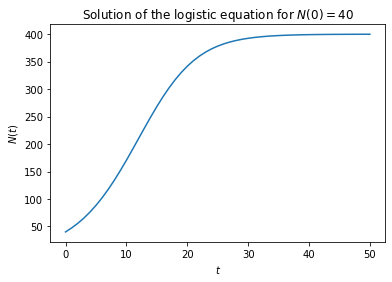

In [10]:
plt.plot(y)
plt.xlabel('$t$')
plt.ylabel('$N\\left(t\\right)$')
plt.title('Solution of the logistic equation for $N\\left(0\\right)=40$')
plt.show()

### Problem 3.2: ###
In the basic two-step model for population growth, each time step has a birth phase: 
$$ N^\prime\left(t\right) = \left(1+b\right)N\left(t\right) $$
followed by a death phase
$$ N^{\prime\prime}\left(t\right) = \left(1+d\right)N^\prime \left(t\right) $$

$$ N\left(t+1\right) = \left(1+d\right)\left(1+b\right)N\left(t\right) = R\left(N\left(t\right)\right)\;N\left(t\right)$$  

In the logistic model, we assumed that the number of surviving offspring
per parent, $R$, declines linearly with population size $N$.  
Show that growth is still
described by equation (3.5a) 
$$ N\left(t+1\right) = N\left(t\right) + r N\left(t\right)\left(1-\frac{N\left( t\right)}{k}\right)$$ 
if we assume instead that   
1. only the birth rate $b$ depends linearly on $N$ 
2. only the death rate $d$ depends linearly on $N$. 
3. Show, however, that if both $b$ and $d$ depend linearly on $N$, then $R\left(N\right)$ is not a linear function
   of $N$. Recall the definition $R = \left(1 -d\right)\left(1 + b\right)$ and assume that $R\left(0\right) = 1 + r$ and $R\left(k\right) = 1$.


#### solution ####

We are asked about linearity in terms of $N$, so it makes sense to break $R\left(N\right)$ in powers of $N$
$$ R\left(N\right) = 1 + r -\frac{r}{k}N $$

Which has a constant $1+r$ part and a linear $-rN/k$ part.

1. if only the birth rate is linearly dependent:  
    $$ b=b_0 - b_1 N$$  
    $-$ since we expect birth to lower in a crowded environment.  
    Applying to $R$
    $$ R\left(N\right) = \left(1-d\right)\left(1+b_0 - b_1 N\right) = 1 + \underbrace{b_0 -d - d b_0}_{r} - \underbrace{\left(1-d\right)b_1}_{r/k} N$$

2. if only the death rate is linearly dependent:  
    $$ d=d_0 + d_1 N$$  
    $+$ since we expect death to increase in an overcrowded environment.  
    Applying to $R$
    $$ R\left(N\right) = \left(1-d_0 - d_1 N\right)\left(1+b\right) = 1 + \underbrace{-d_0 +b - d_0 b}_{r} - \underbrace{\left(1+b\right)d_1}_{r/k} N$$

3. if both a linearly dependent:
$$ b=b_0-b_1N \quad d=d_0+d_1N $$
   Then we get a "cross" term which is quadratic
   $$ R\left(N\right) = \left(1-d_0 - d_1 N\right)\left(1+b_0 - b_1 N\right) = 1 + \underbrace{b_0-d_0 - d_0 b_0}_{r} - \underbrace{\left(b_1+d_1+b_1 d_0 - d_1 b_0\right)}_{r/k} \;N + \underbrace{b_1d_1}_{?} \; N^2$$
   This essentially "corrects" for how the decreased birth or increased death "free up" more resources for the next stage, with lower deathrate or increased birthrate.

## cobweb plots ##

We haven't had the time

One way to visualize the recurrence relation is as a plot $N\left(t+1\right) = F\left\lbrack N\left(t\right)\right]$ like a regular function $y=f\left(x\right)$. In every time, our solution is on this line, in the sense that $\left\lbrace N\left(t\right), N\left(t+1\right) \right\rbrace$ is trace on it  

In [11]:
def cobweb_frame(xymin, xymax, axe=None, var_name='N', show=True):
    """Frame a cobweb plot: produce n(t) n(t+1) labels, equal aspect, and set axe limits to a,b."""
    if axe is None:
        axe = plt.gca()
    a, b = xymin, xymax
    axe.set_xlabel(fr'${var_name}\left(t\right)$')
    axe.set_ylabel(fr'${var_name}\left(t+1\right)$')
    axe.set_aspect('equal')
    axe.set_xlim(a,b)
    axe.set_ylim(a,b)
    if show:
        plt.legend()
        plt.show()
    return axe

def get_padded_limits(x, factor=1.5):
    a, b = np.min(x), np.max(x)
    p, q = (a+b)/2, (b-a)/2
    a2, b2 = p-factor*q, p+factor*q
    a2 = max(0, a2) if a>=0 else a2
    b2 = min(0, b2) if b<=0 else b2
    return a2, b2

def cobweb_plotter(recurse_func: callable, n: np.ndarray, i=-1, axe=None, show=True, ab=None):
    i=min(i,len(n))
    if axe is None:
        axe = plt.gca()
    if i==0:
        axe.plot(0,n[0],'*',color='C0', label=r'$N\left(0\right)$')
    else:
        axe.plot([n[0],n[0]],[0,n[1]], linewidth=2, color='C0',label=r'$N\left(t\right)$')
    if i>1:
        axe.stairs(n[1:i//2+1],n[:i//2+1],baseline=None, linewidth=2, color='C0')
        if i%2 == 1:
            axe.plot([n[i//2],n[i//2]],[n[i//2],n[i//2+1]], linewidth=2, color='C0')
    # get a nice range to plot the recursion function
    a, b = get_padded_limits(n[:max(i,5)])
    if ab is not None:
        a, b = min(*ab,a), max(*ab,b)
    n_range = np.linspace(a, b, 200)
    axe.plot(n_range, recurse_func(n_range), color=(0.1,0.1,0.1),linestyle='-', label=r'$f\left(N\right)$')
    axe.axline( (a,a), (b,b), color=(0.1,0.1,0.1), linestyle='--', label='y=x')
    return cobweb_frame(a, b, axe, show=show)


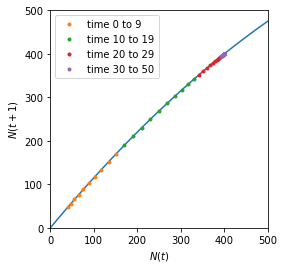

In [12]:
f = lambda x: x+0.2*x*(1-x/400) # logistic recursion N(t+1)=f(N) with r=0.2 and k=400
y = solve_recursion(f, t_final=50, y0=40)
N_range = np.linspace(0,500)
plt.plot(N_range, f(N_range))
plt.plot(y[:10], y[1:11],'.', label='time 0 to 9')
plt.plot(y[10:20], y[11:21],'.', label='time 10 to 19')
plt.plot(y[20:30], y[21:31],'.', label='time 20 to 29')
plt.plot(y[30:-1], y[31:],'.', label='time 30 to 50')
cobweb_frame(0,500);
# make axis and show (hidden above)

Using colors, we can track the population along the recurrence function. A cobweb plot tracks this progress more efficiently, by essentially spliting the process into "stairs":  
At time $t$, start at point $\left\lbrace N\left(t\right),N\left(t\right) \right\rbrace$  
1. the next value is $N\left(t+1\right) = f\left(N\left(t\right)\right)$, so we draw a line up (or down) to $\left\lbrace N\left(t\right),f\left(N\left(t\right)\right) \right\rbrace$
2. we move to the next time $t+1$, so we go to $\left\lbrace N\left(t+1\right),N\left(t+1\right) \right\rbrace$, which is the same as $\left\lbrace f\left(N\left(t\right)\right),f\left(N\left(t\right)\right) \right\rbrace$ to the side.

This essentially has the line "bounce" between the graph of $y=x$ and the function $y=f\left(x\right)$

In [13]:
i=0

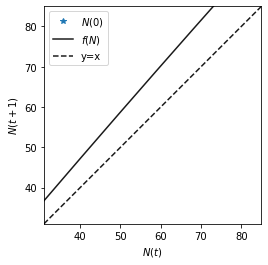

In [14]:
# ctrl-Enter for more points
cobweb_plotter(f,y,i)
i += 1

### Problem 3.4: The Ricker model ###

Many alternatives to the logistic equation have been described, each of which incorporates different assumptions about how density affects the per-capita
growth term $R\left(N\right)$.  
1. Write the recursion and difference equations for n under the assumption that $R\left(N\right)$ decreases exponentially from $1 + r$ as the population size 
   increases, so that $R\left(N\right)$ can be written as $\left(1 + r\right) e^{-\alpha N\left(t\right)}$.
2. According to the recursion equation that you derive, is it possible for $N\left(t + 1\right)$ to be negative if $N\left(t\right)$ is positive (justify your answer)?  

This model is known as the Ricker model

Guidence:  
Add a new markdown text cell (<kbd> esc</kbd> then <kbd>b</kbd> then <kbd>m</kbd> then <kbd>Enter</kbd>)  
Markdown cells support equation via $\LaTeX$, for example  $ \alpha + \frac{1}{\beta} $  
You can copy paste from desmos and sandwhich between  two dollars \\$ $ [like from here](https://www.desmos.com/calculator/aecaghpwsx)  
or even write in pen and copy+paste the picture 

#### Solution ####

1. We just substitute $R$ into the equation $N\left(t+1\right) = R\left(N\right) N$   
   $$ N\left(t+1\right) =  \left(1+r\right)e^{-\alpha N\left(t\right)}N\left(t\right) $$  
   
   Note how, when $\alpha N$ is small:
   $$ N\left(t+1\right) \approx \left(1+r\right)\left(1-\alpha N\left(t\right)\right)N\left(t\right) $$  
   $$ N\left(t+1\right) \approx N\left(t\right) + r\left(1-\frac{\alpha\left(1+r\right)}{r} N\left(t\right)\right)N\left(t\right) $$  
   which is similar to the logistic equation.  

2. $N\left(t+1\right)$ cannot be negative given a positive $N\left(t\right)$, since:  
   $$ N\left(t+1\right) = \underbrace{1+r}_{\text{positive}} \times \underbrace{e^{-\alpha N\left(t\right)}}_{\text{positive}} \times \underbrace{N\left(t\right)}_{\text{positive}}$$  
   So as long as $N\left(0\right)>0$, all future values will be positive.  
   This does not mean the population always grows: the *difference* can still be negative, 
   $$ N\left(t+1 \right) - N\left(t\right) = \Delta N= \left\lbrack \left(1+r\right)e^{-\alpha N\left(t\right)}-1\right\rbrack \times N\left(t\right)$$  
   which, when $\alpha N \gg 1$ is negative $-1$  
   This gives us a testable prediction: for populations far above the carrying capacity, all populations should decline in a fixed rate!

#### ####
---  
*Not to be confused with programming  <a id="recursion_bottom"> [function recursion](#recursion_top)</a>*

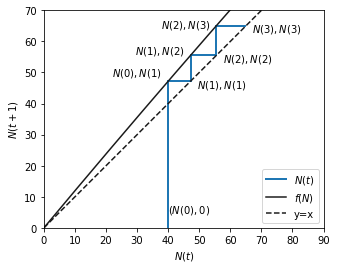

In [15]:
f = lambda x: x+0.2*x*(1-x/400) # logistic recursion N(t+1)=f(N) with r=0.2 and k=400
y = solve_recursion(f, t_final=50, y0=40)
cobweb_plotter(f,y[:10],6, show=False, ab=(0,80))
plt.annotate(f'$\\left(N\\left(0\\right),0\\right)$',xy=(y[0],plt.ylim()[0]+5))
for i in range(6):
    if i%2==0:
        xy=(y[i//2],y[i//2+1])
        xytext = xy[0]-18, xy[0]+9
        plt.annotate(f'$N\\left({i//2}\\right),N\\left({i//2+1}\\right)$',xy,xytext)
    else:
        xy=(y[i//2+1],y[i//2+1])
        xytext = xy[0]+2, xy[0]-2
        plt.annotate(f'$N\\left({i//2+1}\\right),N\\left({i//2+1}\\right)$',xy, xytext)

plt.xlim(0,90)
plt.ylim(0,70)
plt.legend(loc='lower right')
fig=plt.gcf()
#plt.savefig('../Tutorial 4/temp.png')
plt.show()

In [16]:
(y[5],y[6])

(88.30000891942775, 102.06156491572779)

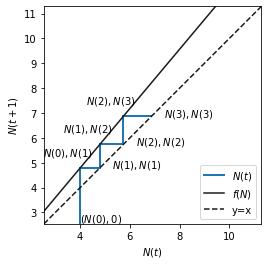

In [42]:
f = lambda x: x+0.2*x*(1-x/400) # logistic recursion N(t+1)=f(N) with r=0.2 and k=400
y = solve_recursion(f, t_final=10, y0=4)
cobweb_plotter(f,y,6, show=False)
a,b = plt.xlim()
plot_scale = b-a
plt.annotate(f'$\\left(N\\left(0\\right),0\\right)$',xy=(y[0],plt.ylim()[0]+0.01*plot_scale))
for i in range(6):
    if i%2==0:
        xy=(y[i//2],y[i//2+1])
        xytext = xy[0]-1.5, xy[1]+0.5
        plt.annotate(f'$N\\left({i//2}\\right),N\\left({i//2+1}\\right)$',xy,xytext)
    else:
        xy=(y[i//2+1],y[i//2+1])
        xytext = xy[0]+0.5, xy[1]
        plt.annotate(f'$N\\left({i//2+1}\\right),N\\left({i//2+1}\\right)$',xy, xytext)

#plt.xlim(0,90)
#plt.ylim(0,70)
plt.legend(loc='lower right')
fig=plt.gcf()
#plt.savefig('../Tutorial 4/temp7.png')
plt.show()